In [376]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from sklearn.preprocessing import MinMaxScaler

# Data Understanding & Cleaning

In [377]:
# Reading the Dataset
data = pd.read_excel('marketing_campaign1.xlsx')

In [378]:
# Checking the Header
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [379]:
# Checking the shape of the dataset
data.shape

(2240, 29)

In [380]:
#Identify categorical & numerical features
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [381]:
#  Checking Descriptive statistics
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [382]:
data.describe(include=object)

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [383]:
# Checking the duplicates
duplicate_count = data.duplicated().sum()
print(duplicate_count)

0


# Checking the null values

In [384]:
# Checking the null values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Text(0.5, 1.0, 'Income Distribution')

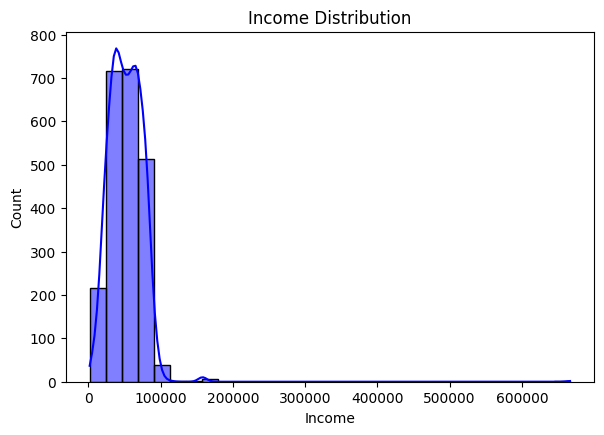

In [385]:
# histograms for Income distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')

In [386]:
# Impute missing values with median (since Income is skewed)
median_income = data['Income'].median()
data['Income'] = data['Income'].fillna(median_income)

In [387]:
# Checking the null values
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Data Visualization

In [388]:
# Select relevant columns for correlation analysis
relevant_columns = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth', 'Response'
]

In [389]:
# Create a subset of the DataFrame
df_subset = data[relevant_columns]

# Calculate the correlation matrix
corr = df_subset.corr(numeric_only=True)

In [390]:
# Create an interactive heatmap using Plotly
fig = px.imshow(
    corr,
    text_auto=True,  # Automatically display correlation values
    color_continuous_scale='viridis',  # Use the 'viridis' color scale
    labels=dict(x="Features", y="Features", color="Correlation"),  # Axis labels
    title="Correlation Heatmap (Selected Columns)"  # Title of the plot
)

# Update layout for better readability
fig.update_layout(
     xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    width=1000,  # Increase width
    height=1000  # Increase height
)

# Show the plot
fig.show()

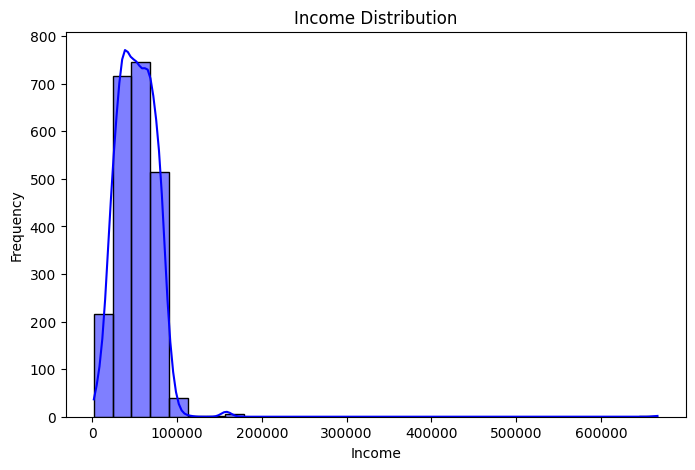

In [391]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Income"], bins=30, kde=True, color="blue")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

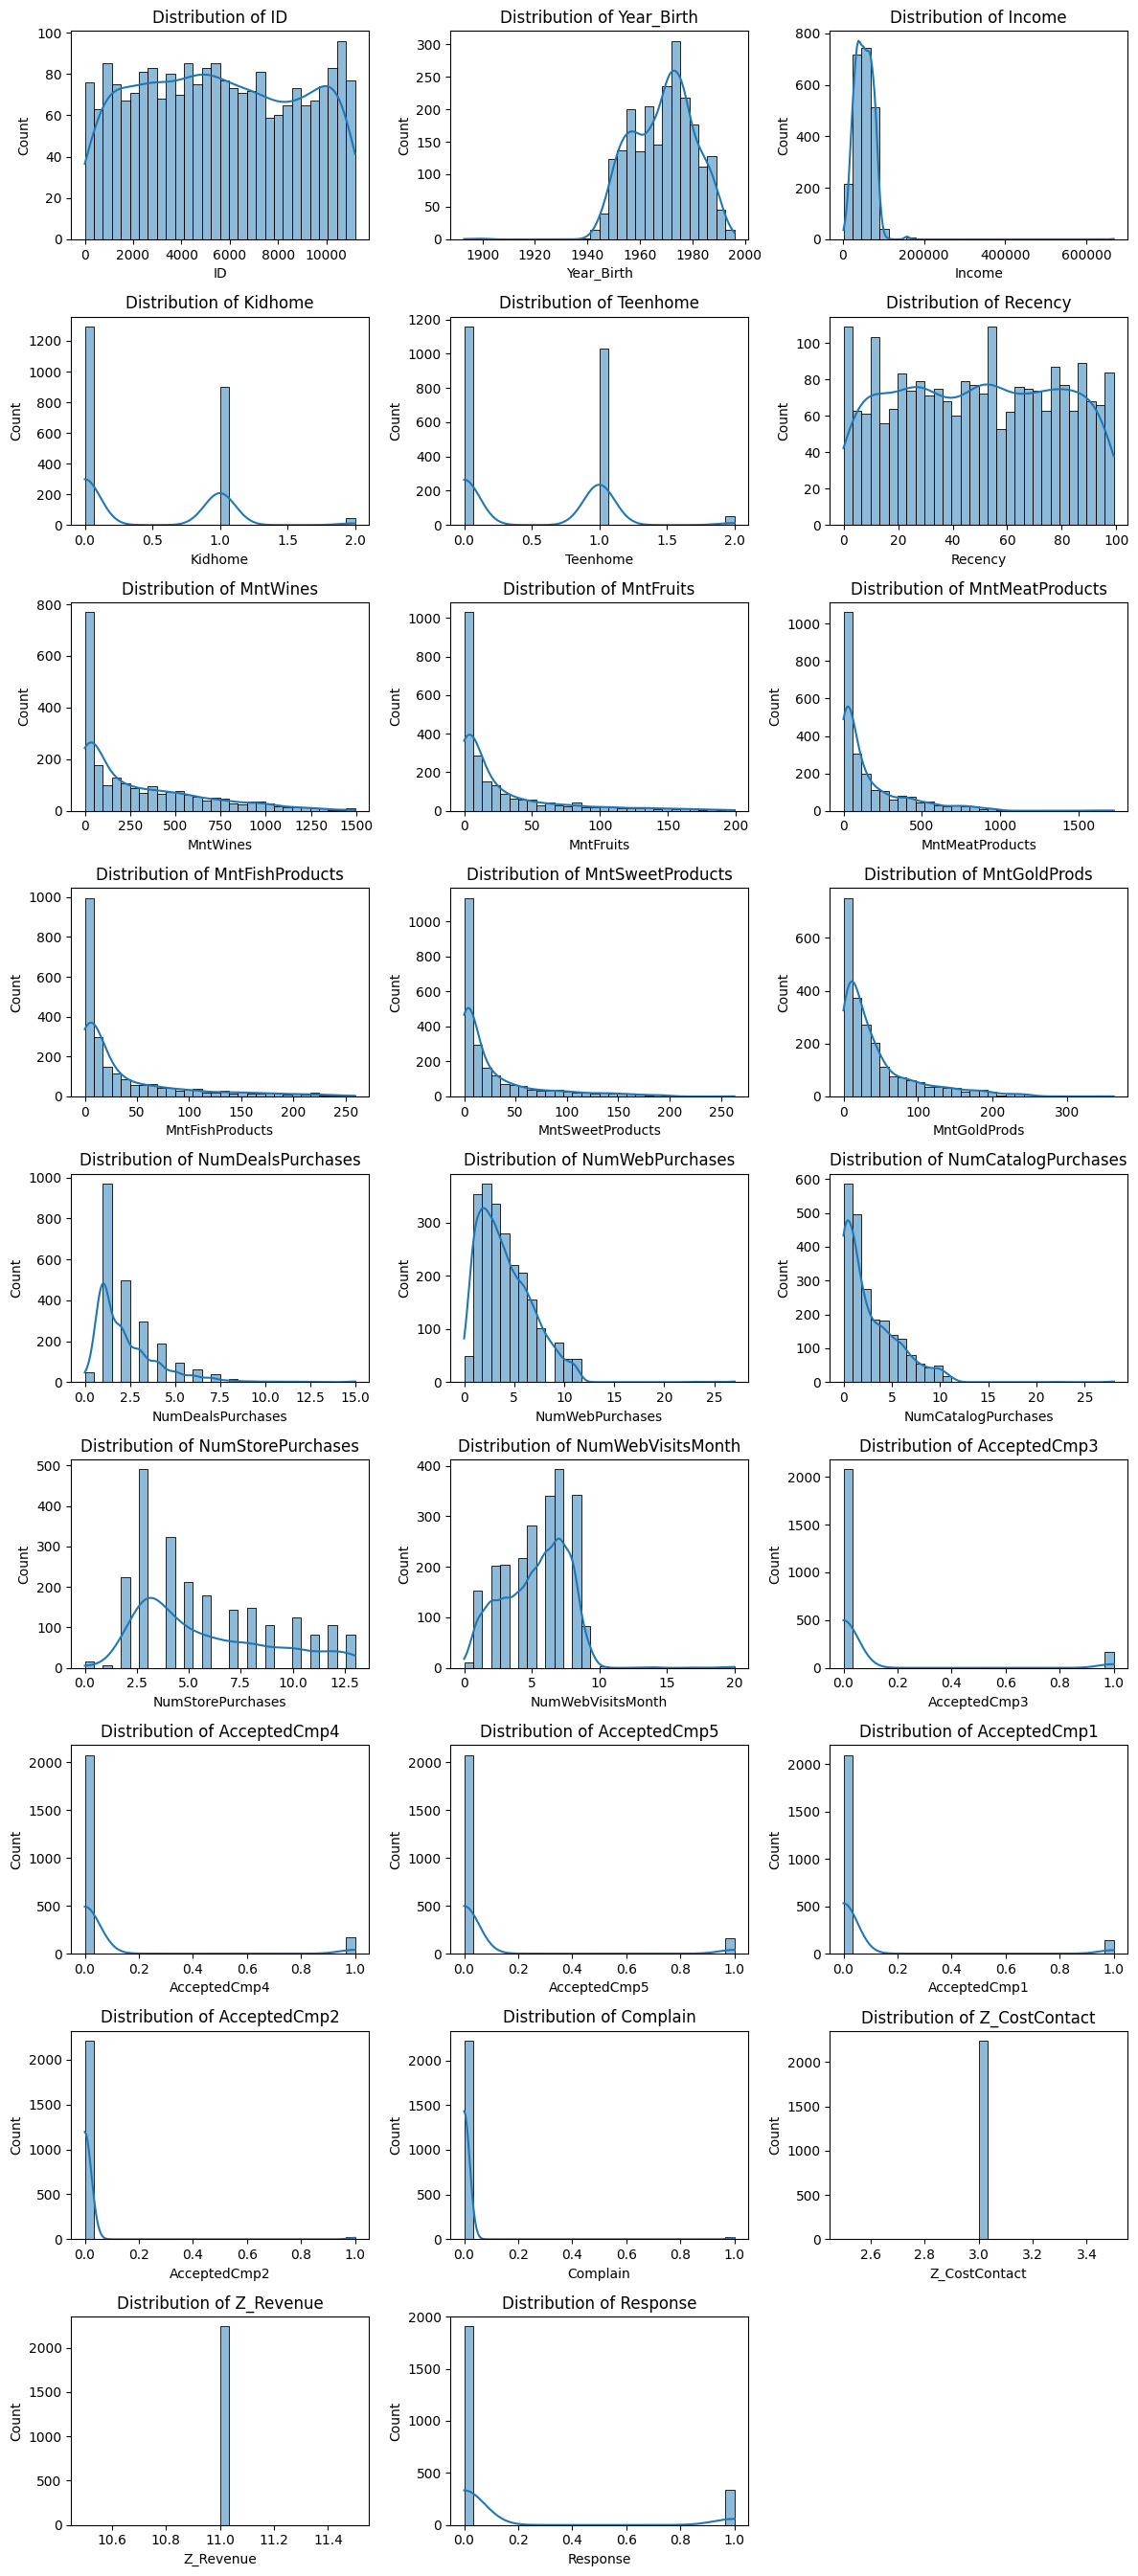

In [392]:
#histograms for all numerical features to visualize their distributions
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

num_features = len(numerical_features)
rows = math.ceil(num_features / 3)  

plt.figure(figsize=(12, rows * 3))  
for i, col in enumerate(numerical_features, 1):
    plt.subplot(rows, 3, i) 
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [393]:
categorical_features = data.select_dtypes(include=['object']).columns

# count plots for each categorical variable
for col in categorical_features:
    count_data = data[col].value_counts().reset_index()
    count_data.columns = [col, 'Count']  # Rename columns

    # bar chart
    fig = px.bar(count_data, x=col, y='Count', text='Count', 
                 title=f'Countplot of {col}', opacity=0.7)

    fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for readability
    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count",
        width=800, 
        height=500
    )   
    fig.show()

In [394]:
# Pie chart for Education
fig = px.pie(data, names="Education", title="Education Distribution")
fig.show()

# Pie chart for Marital_Status
fig = px.pie(data, names="Marital_Status", title="Marital Status Distribution")
fig.show()

In [395]:
# bar plot: Education vs Marital_Status
cross_tab = pd.crosstab(data['Education'], data['Marital_Status'])
fig = px.bar(cross_tab, barmode="group", title="Education vs Marital Status")
fig.show()

In [396]:
expenses = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values()

# horizontal bar chart
fig = px.bar(expenses, x=expenses.values, y=expenses.index, orientation='h', text=expenses.values, 
             title='Expenses', labels={'x': 'Total Amount Spent', 'y': 'Product Category'})

# layout 
fig.update_traces(textposition='outside', marker_color='skyblue')
fig.update_layout(title_font_size=18, title_font_color='black', title_x=0.5, 
                  xaxis_title='Total Amount Spent', yaxis_title='Product Category', 
                  plot_bgcolor='lightyellow')
fig.show()

# Feature Engineering

In [397]:
#Age Column
data['Age'] = 2025 - data['Year_Birth']

In [398]:
#Total Spending
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts']+ data['MntSweetProducts'] + data['MntGoldProds']

In [399]:
#Total Purchases
data['Total_Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [400]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,422,19


In [401]:
col=['Age','Education','Marital_Status','Income','Recency','Total_Spent','Total_Purchases']
final_data = data[col]

In [402]:
final_data.head()

,Age,Education,Marital_Status,Income,Recency,Total_Spent,Total_Purchases
0,68,Graduation,Single,58138.0,58,1617,25
1,71,Graduation,Single,46344.0,38,27,6
2,60,Graduation,Together,71613.0,26,776,21
3,41,Graduation,Together,26646.0,26,53,8
4,44,PhD,Married,58293.0,94,422,19


In [403]:
final_data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [404]:
final_data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [405]:
final_data

,Age,Education,Marital_Status,Income,Recency,Total_Spent,Total_Purchases
0,68,Graduation,Single,58138.0,58,1617,25
1,71,Graduation,Single,46344.0,38,27,6
2,60,Graduation,Together,71613.0,26,776,21
3,41,Graduation,Together,26646.0,26,53,8
4,44,PhD,Married,58293.0,94,422,19
...,...,...,...,...,...,...,...
2235,58,Graduation,Married,61223.0,46,1341,18
2236,79,PhD,Together,64014.0,56,444,22
2237,44,Graduation,Divorced,56981.0,91,1241,19
2238,69,Master,Together,69245.0,8,843,23


# Outlier detection

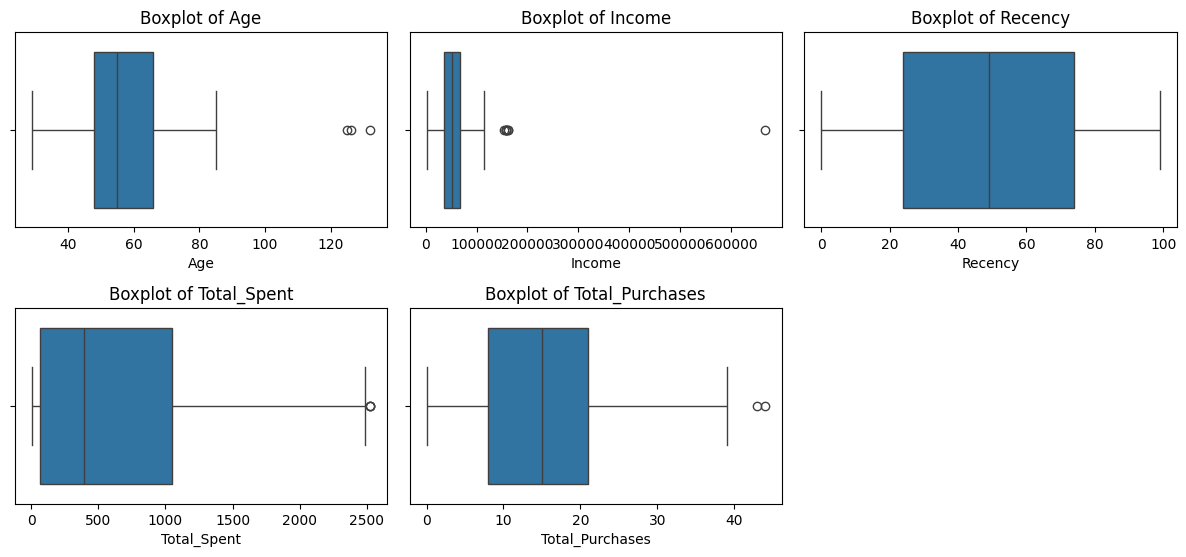

In [406]:
# Boxplots for outlier detection
features = final_data.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=final_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show() 

In [407]:
# Function to remove outliers using IQR
def remove_outliers_iqr(final_data, column):
    Q1 = final_data[column].quantile(0.25)
    Q3 = final_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return final_data[(final_data[column] >= lower_bound) & (final_data[column] <= upper_bound)]

In [408]:
final_data = remove_outliers_iqr(final_data, "Age")
final_data = remove_outliers_iqr(final_data, "Income")
final_data = remove_outliers_iqr(final_data, "Total_Spent")
final_data = remove_outliers_iqr(final_data, "Total_Purchases")

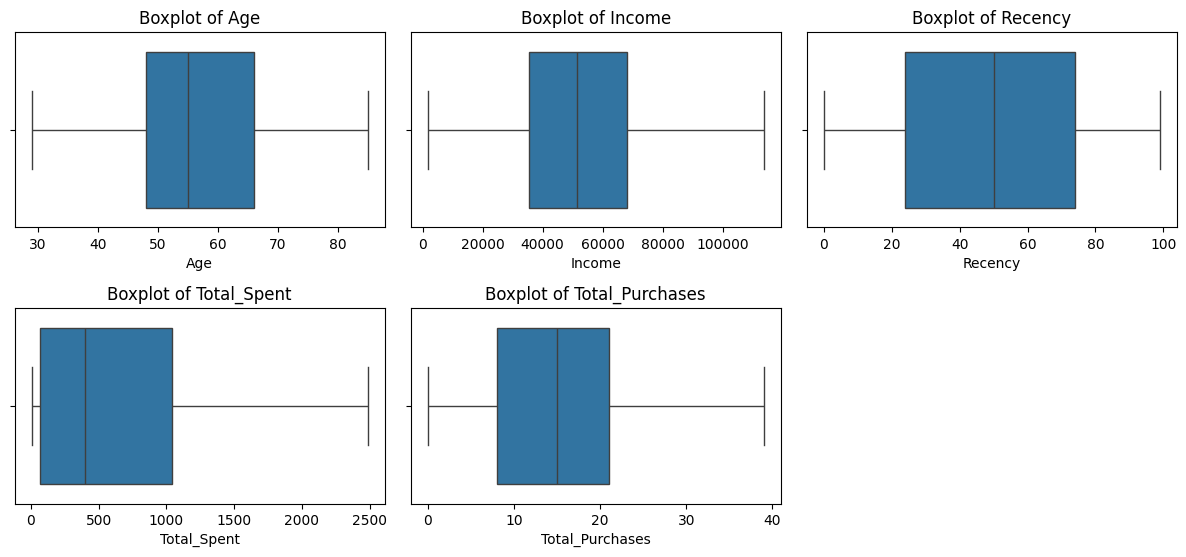

In [409]:
# Boxplots for outlier detection
features = final_data.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=final_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show() 

# Label Encoding

In [410]:
# Define Binary Encoding
education_mapping = {
    'Graduation': 1, 'Master': 1, 'PhD': 1,  # Higher Education
    'Basic': 0, '2n Cycle': 0  # Lower Education
}

marital_mapping = {
    'Single': 0, 'Alone': 0, 'Absurd': 0, 'YOLO': 0,'Divorced': 0, 'Widow': 0,  # Single
    'Together': 1, 'Married': 1   #Married
}

# Apply Encoding
final_data.loc[:, 'Education'] = final_data['Education'].map(education_mapping)
final_data.loc[:, 'Marital_Status'] = final_data['Marital_Status'].map(marital_mapping)

In [411]:
print(final_data)

      Age Education Marital_Status   Income  Recency  Total_Spent  \
0      68         1              0  58138.0       58         1617   
1      71         1              0  46344.0       38           27   
2      60         1              1  71613.0       26          776   
3      41         1              1  26646.0       26           53   
4      44         1              1  58293.0       94          422   
...   ...       ...            ...      ...      ...          ...   
2235   58         1              1  61223.0       46         1341   
2236   79         1              1  64014.0       56          444   
2237   44         1              0  56981.0       91         1241   
2238   69         1              1  69245.0        8          843   
2239   71         1              1  52869.0       40          172   

      Total_Purchases  
0                  25  
1                   6  
2                  21  
3                   8  
4                  19  
...               ...  
223

# Visualization on final data

In [412]:
# Create histogram for Age
fig = px.histogram(data, x="Age", nbins=30, title="Age Distribution", 
                   labels={'Age': 'Age of Customers'}, 
                   color_discrete_sequence=['skyblue'])
fig.update_layout(title_font_size=18, title_x=0.5, 
                  xaxis_title='Age', yaxis_title='Number of Customers', 
                  plot_bgcolor='white')
fig.show()

In [413]:
fig = px.histogram(data, x="Total_Spent", nbins=30, title="Total Spending Distribution")

# Update layout for better readability
fig.update_layout(
    xaxis_title="Total Spending",
    yaxis_title="Number of Customers",
    title_font_size=20,
    title_x=0.5
)

# Show the plot
fig.show()

In [414]:
corr_matrix = data[['Age', 'Income', 'Recency', 'Total_Spent', 'Total_Purchases']].corr()
#heatmap 
fig = px.imshow(corr_matrix, 
                text_auto=True,  # Display correlation values on the heatmap
                color_continuous_scale='Blues',  # Use a blue color scale
                title='Correlation Heatmap')
fig.update_layout(
     xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    width=700,  # Increase width
    height=700  # Increase height
)
fig.show()

In [415]:
#Marital_Status 0 = single, 1 = Married
#Education	0 =Primary and Secondary Education ,1 = Post Education
final_data

,Age,Education,Marital_Status,Income,Recency,Total_Spent,Total_Purchases
0,68,1,0,58138.0,58,1617,25
1,71,1,0,46344.0,38,27,6
2,60,1,1,71613.0,26,776,21
3,41,1,1,26646.0,26,53,8
4,44,1,1,58293.0,94,422,19
...,...,...,...,...,...,...,...
2235,58,1,1,61223.0,46,1341,18
2236,79,1,1,64014.0,56,444,22
2237,44,1,0,56981.0,91,1241,19
2238,69,1,1,69245.0,8,843,23


# Data Scaling

In [416]:
print(final_data.skew())

Age                0.089489
Education         -2.421329
Marital_Status    -0.604145
Income             0.015584
Recency           -0.006813
Total_Spent        0.849431
Total_Purchases    0.216685
dtype: object


#### Many features are skewed so we used minmax scaling method

In [417]:
#Separate numerical and categorical columns
numerical_cols =['Age','Education', 'Marital_Status', 'Income', 'Recency', 'Total_Spent', 'Total_Purchases']

numerical_data = final_data[numerical_cols]

In [418]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

In [419]:
# Convert scaled data to DataFrame
final_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

In [420]:
print(final_df)

           Age  Education  Marital_Status    Income   Recency  Total_Spent  \
0     0.696429        1.0             0.0  0.503625  0.585859     0.649738   
1     0.750000        1.0             0.0  0.398325  0.383838     0.008867   
2     0.553571        1.0             1.0  0.623933  0.262626     0.310762   
3     0.214286        1.0             1.0  0.222456  0.262626     0.019347   
4     0.267857        1.0             1.0  0.505009  0.949495     0.168077   
...        ...        ...             ...       ...       ...          ...   
2220  0.517857        1.0             1.0  0.531169  0.464646     0.538493   
2221  0.892857        1.0             1.0  0.556087  0.565657     0.176945   
2222  0.267857        1.0             0.0  0.493295  0.919192     0.498186   
2223  0.714286        1.0             1.0  0.602791  0.080808     0.337767   
2224  0.750000        1.0             1.0  0.456582  0.404040     0.067312   

      Total_Purchases  
0            0.641026  
1            0.

# Model 1 : K-Means Clustering 

In [421]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [422]:
data1 = final_df.copy()

In [423]:
#Find the Optimal K using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data1)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data1, kmeans.labels_))

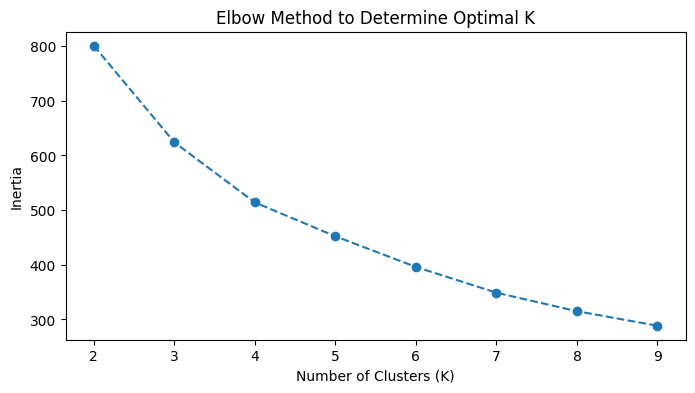

In [424]:
#Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

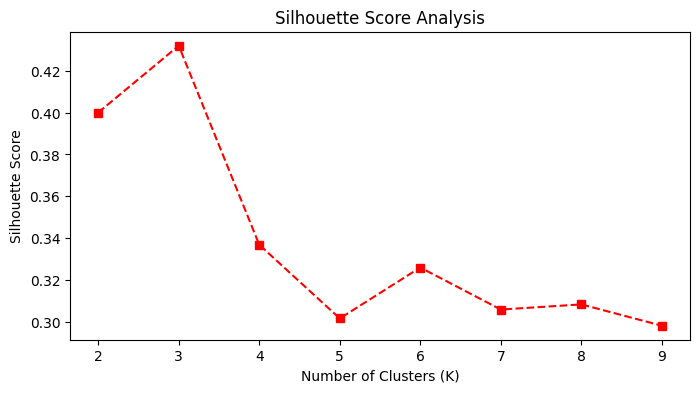

In [425]:
#Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

In [426]:
#Train the Final K-Means Model with Optimal K
optimal_k = 3 
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data1['Cluster'] = kmeans_final.fit_predict(data1)

### Model Evaluation

In [427]:
#Compute Silhouette Score
silhouette_avg = silhouette_score(data1.iloc[:, :-1], data1['Cluster'] )
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score for K=3: 0.4320


# Model 2 : Hierarchical Clustering 

In [428]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster ,dendrogram

In [429]:
data2 = final_df.copy()

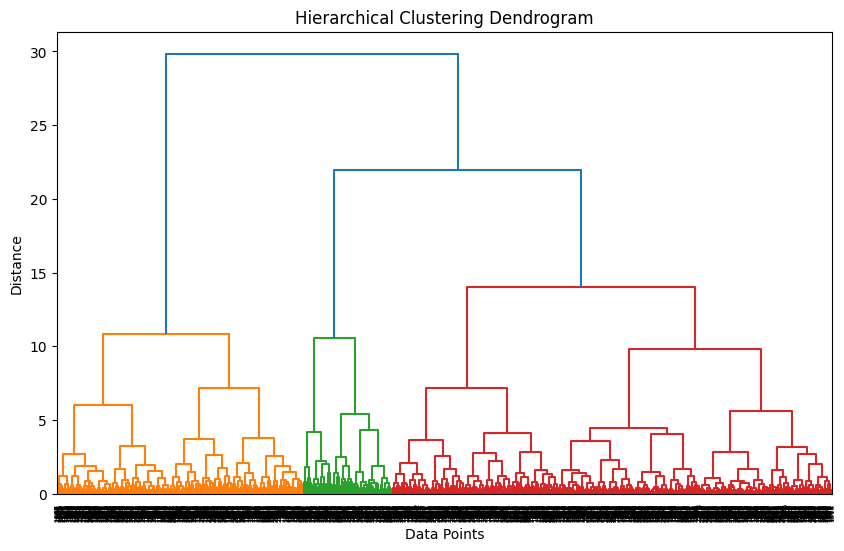

In [430]:
# Perform hierarchical clustering
linkage_matrix = linkage(data2, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [431]:
silhouette_scores = []
linkage_matrix = linkage(data2, method='ward')

# Compute Silhouette Score for different values of K
for k in range(2, 10):  # K from 2 to 10
    cluster_labels = fcluster(linkage_matrix, k, criterion='maxclust')  # Assign clusters
    score = silhouette_score(data2, cluster_labels)  # Compute Silhouette Score
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={k}: {score:.4f}")

Silhouette Score for K=2: 0.3682
Silhouette Score for K=3: 0.4320
Silhouette Score for K=4: 0.3232
Silhouette Score for K=5: 0.2810
Silhouette Score for K=6: 0.3054
Silhouette Score for K=7: 0.2805
Silhouette Score for K=8: 0.2717
Silhouette Score for K=9: 0.2659


In [432]:
# Choosing the optimal number of clusters
k_optimal = 3
# Applying Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=k_optimal, metric='euclidean', linkage='ward')
data2['Cluster'] = hc.fit_predict(data2)

### Model Evaluation

In [433]:
silhouette_avg_hc = silhouette_score(data2.drop(columns=['Cluster']), data2['Cluster'])
print(f"Silhouette Score for Hierarchical Clustering (K={k_optimal}): {silhouette_avg_hc:.4f}")

Silhouette Score for Hierarchical Clustering (K=3): 0.4320


# Model 3 : DBSCAN

In [434]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [435]:
data3 = final_df.copy()

In [436]:
# Applying DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=8, metric='euclidean')
data3['Cluster'] = dbscan.fit_predict(data3)

In [437]:
# If there are noise points (-1), reassign them to the closest valid cluster
if -1 in data3['Cluster'].values:
    valid_clusters = data3[data3['Cluster'] != -1]['Cluster'].unique()
    for idx in data3[data3['Cluster'] == -1].index:
        data3.at[idx, 'Cluster'] = np.random.choice(valid_clusters) 

In [438]:
num_clusters = len(set(data3['Cluster'])) - (1 if -1 in data3['Cluster'].values else 0)
print(f"Number of clusters formed: {num_clusters}")

Number of clusters formed: 4


### Model Evaluation

In [439]:
# Evaluating the model using silhouette score
if len(set(data3['Cluster'])) > 1:  # Ensuring more than one cluster is present
    silhouette_avg = silhouette_score(data2.drop(columns=['Cluster']), data3['Cluster'])
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    print("Silhouette Score cannot be calculated as all points are in one cluster.")

Silhouette Score: 0.4473


# Model 4 :Gaussian Mixture Model

In [440]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [441]:
data4 = final_df.copy()

In [442]:
# Range of clusters to test
cluster_range = range(3, 10)  
silhouette_scores = []

for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(data4)
    
    labels = gmm.predict(data4)
    
    # Compute Silhouette Score
    silhouette_scores.append(silhouette_score(data4, labels))

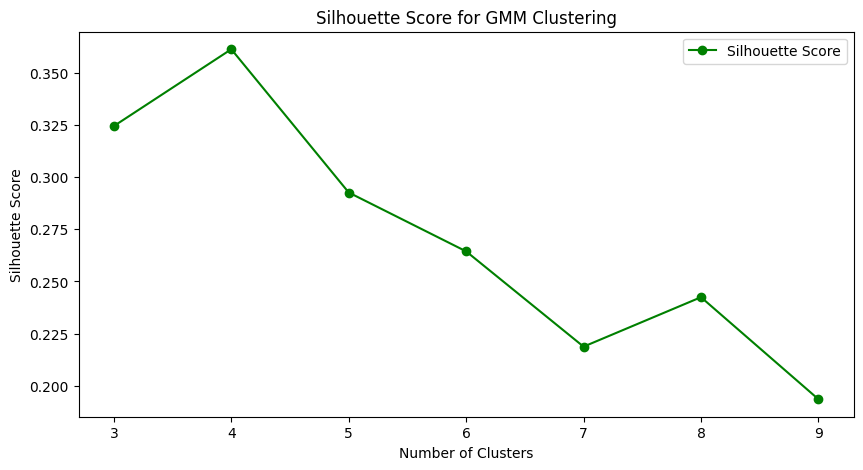

In [443]:
# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, label='Silhouette Score', marker='o', color='green')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for GMM Clustering")
plt.legend()
plt.show()

In [444]:
# Define the number of clusters
n_components = 4

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(data4)

GaussianMixture(n_components=4, random_state=42)

In [445]:
# Predict cluster labels
labels = gmm.predict(data4)

### Model Evaluation

In [446]:
# Evaluate model using Silhouette Score
silhouette = silhouette_score(data4, labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.36143923185826177
